>> Pearson correlation heatmap generated and saved as 'pearson_correlation_raw_data.pdf'.


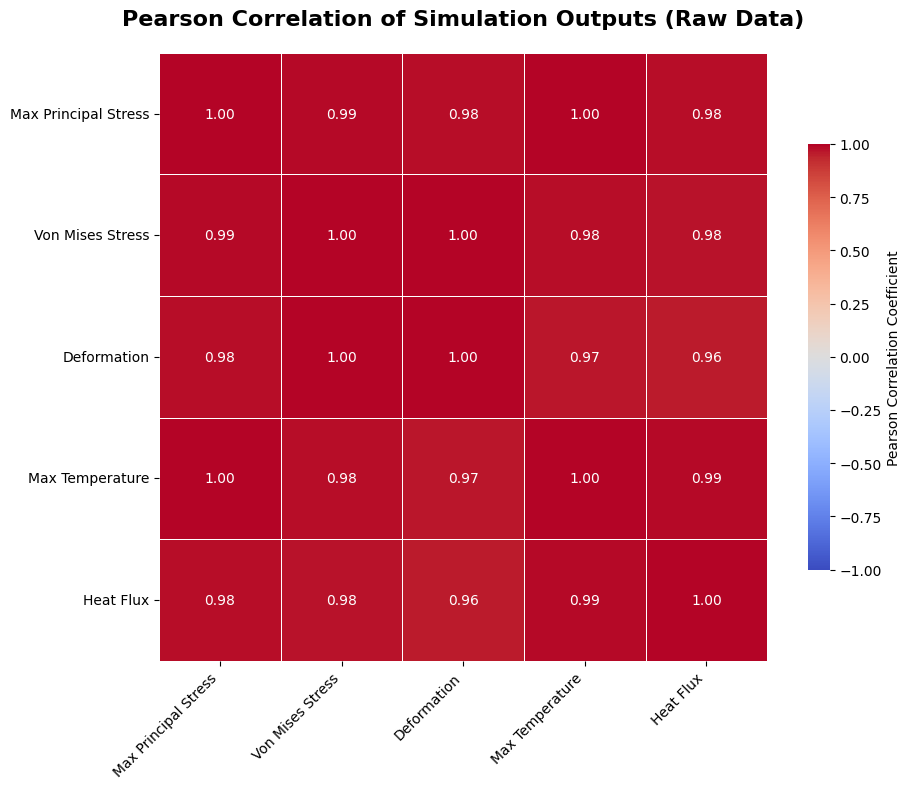

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io

# ==========================================
# 1. INGEST DATA (Source of Truth)
# ==========================================
csv_content = """Run,Material,Power_W/mm2,Speed_mm/s,Radius_mm,Y1_Max_Prin_Stress (MPa),Y2_Max_Von_Mises,Y3_Deformation mm,Max Temp,Heat flux
1,CoCrFeNiMn ,137.27,5.31,1.44,355.95,1360.2,0.0172,255.24,0.4193
2,CoCrFeNiMn ,260.59,39.51,1.11,43.22,215.36,0.0027,58.48,0.0933
3,CoCrFeNiMn ,183.35,21.1,1.22,70.385,339.24,0.0042,79.584,0.1412
4,CoCrFeNiMn ,56.31,32.79,0.89,7.3,36.37,0.0005,28.17,0.0158
5,CoCrFeNiMn ,86.3,22.69,1.06,22.986,112.5,0.0014,41.09,0.0474
6,CoCrFeNiMn ,217.8,33.32,1.4,67.52,336.46,0.0042,78.97,0.1449
7,CoCrFeNiMn ,289.23,16.03,0.92,86.55,403.25,0.005,90.65,0.1651
8,CoCrFeNiMn ,169.14,49.17,1.27,29.557,147.42,0.0018,46.94,0.0649
9,CoCrFeNiMn ,147.07,16.71,0.94,43.89,204.7,0.0025,56.82,0.0838
10,CoCrFeNiMn ,282.05,28.76,1.29,0,0,0,22,0
11,AlCoCrFeNi,137.27,5.31,1.44,405.6,1982.7,0.031,254.83,0.4175
12,AlCoCrFeNi,260.59,39.51,1.11,57.721,310.92,0.005,58.41,0.093
13,AlCoCrFeNi,183.35,21.1,1.22,90.92,490.46,0.0078,79.47,0.1407
14,AlCoCrFeNi,56.31,32.79,0.89,9.65,51.98,0.0008,28.09,0.0156
15,AlCoCrFeNi,86.3,22.69,1.06,30.148,162.61,0.0026,41.06,0.0472
16,AlCoCrFeNi,217.8,33.32,1.4,90.2,485.68,0.0078,78.86,0.1444
17,AlCoCrFeNi,289.23,16.03,0.92,108.03,583.96,0.0092,90.52,0.1645
18,AlCoCrFeNi,169.14,49.17,1.27,39.49,212.61,0.0034,46.9,0.0646
19,AlCoCrFeNi,147.07,16.71,0.94,58.84,296.28,0.0047,56.75,0.0835
20,AlCoCrFeNi,282.05,28.76,1.29,0,0,0,22,0
21,FeCrNiTiAl,137.27,5.31,1.44,404.89,1980.9,0.0311,254.88,0.4171
22,FeCrNiTiAl,260.59,39.51,1.11,54.462,310.64,0.005,58.42,0.093
23,FeCrNiTiAl,183.35,21.1,1.22,58.788,490.1,0.0078,79.48,0.1406
24,FeCrNiTiAl,56.31,32.79,0.89,9.1938,52.51,0.0008,28.16,0.0158
25,FeCrNiTiAl,86.3,22.69,1.06,28.446,162.46,0.0026,41.06,0.0472
26,FeCrNiTiAl,217.8,33.32,1.4,85.11,485.24,0.0078,78.87,0.1444
27,FeCrNiTiAl,289.23,16.03,0.92,101.94,583.43,0.0093,90.532,0.1644
28,FeCrNiTiAl,169.14,49.17,1.27,37.258,212.41,0.0034,46.9,0.0646
29,FeCrNiTiAl,147.07,16.71,0.94,51.748,296.01,0.0047,56.76,0.0834
30,FeCrNiTiAl,282.05,28.76,1.29,0,0,0,22,0
31,NbSiTaTiZr,137.27,5.31,1.44,402.62,1985.1,0.0309,255.76,0.4206
32,NbSiTaTiZr,260.59,39.51,1.11,53.92,311.33,0.0049,58.57,0.0936
33,NbSiTaTiZr,183.35,21.1,1.22,70.41,407.24,0.0065,69.87,0.1175
34,NbSiTaTiZr,56.31,32.79,0.89,9.01,52.05,0.0008,28.12,0.0157
35,NbSiTaTiZr,86.3,22.69,1.06,24.83,134.91,0.0022,37.77,0.0326
36,NbSiTaTiZr,217.8,33.32,1.4,84.27,486.33,0.0077,79.1,0.1453
37,NbSiTaTiZr,289.23,16.03,0.92,100.84,584.51,0.0092,90.78,0.1654
38,NbSiTaTiZr,169.14,49.17,1.27,36.89,212.89,0.0034,47,0.065
39,NbSiTaTiZr,147.07,16.71,0.94,51.19,296.55,0.0047,56.88,0.0839
40,NbSiTaTiZr,282.05,28.76,1.29,0,0,0,22,0
41,HfNbTiZr,137.27,5.31,1.44,404.99,1990.7,0.0311,256.07,0.4218
42,HfNbTiZr,260.59,39.51,1.11,55.88,312.25,0.005,58.62,0.0938
43,HfNbTiZr,183.35,21.1,1.22,87.98,492.33,0.0078,79.77,0.1418
44,HfNbTiZr,56.31,32.79,0.89,9.34,52.2,0.0008,28.12,0.0157
45,HfNbTiZr,86.3,22.69,1.06,29.182,163.3,0.0026,41.165,0.0476
46,HfNbTiZr,217.8,33.32,1.4,87.193,487.08,0.0078,79.1,0.1455
47,HfNbTiZr,289.23,16.03,0.92,104.53,586.2,0.0093,90.88,0.1658
48,HfNbTiZr,169.14,49.17,1.27,38.227,213.52,0.0034,47.04,0.0652
49,HfNbTiZr,147.07,16.71,0.94,53.06,297.41,0.0047,56.93,0.0841
50,HfNbTiZr,282.05,28.76,1.29,0,0,0,22,0
"""
# Load Data
df = pd.read_csv(io.StringIO(csv_content))
df['Material'] = df['Material'].str.strip()
df_clean = df[(df['Y2_Max_Von_Mises'] > 1e-6) & (df['Heat flux'] > 1e-6)].copy()

# ==========================================
# 2. SELECT & COMPUTE CORRELATION
# ==========================================
output_cols = [
    'Y1_Max_Prin_Stress (MPa)',
    'Y2_Max_Von_Mises',
    'Y3_Deformation mm',
    'Max Temp',
    'Heat flux'
]

# Compute Standard Pearson Correlation on Raw Data
df_outputs = df_clean[output_cols]
corr_matrix = df_outputs.corr(method='pearson')

# ==========================================
# 3. PLOTTING
# ==========================================
plt.figure(figsize=(10, 8))
clean_labels = [
    'Max Principal Stress',
    'Von Mises Stress',
    'Deformation',
    'Max Temperature',
    'Heat Flux'
]

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0,
    square=True,
    linewidths=.5,
    xticklabels=clean_labels,
    yticklabels=clean_labels,
    cbar_kws={"shrink": .7, "label": "Pearson Correlation Coefficient"}
)

plt.title("Pearson Correlation of Simulation Outputs (Raw Data)", fontsize=16, pad=20, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('pearson_correlation_raw_data.pdf', format='pdf', dpi=300, bbox_inches='tight')
print(">> Pearson correlation heatmap generated and saved as 'pearson_correlation_raw_data.pdf'.")
plt.show()

Training MOGP on 80% split...


/usr/local/lib/python3.12/dist-packages/gpytorch/models/exact_gp.py:296: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(



--- Validation Results ---
      Dataset           Output      RMSE      R2     NLL
0       Train  Max Prin Stress    9.9497  0.9931  3.7459
1       Train    Max Von Mises  100.3291  0.9679  6.0292
2       Train      Deformation    0.0023  0.9312 -4.6679
3       Train         Max Temp    1.1860  0.9997  2.1344
4       Train        Heat Flux    0.0032  0.9993 -4.0617
5  Validation  Max Prin Stress    2.9662  0.9830  3.4663
6  Validation    Max Von Mises   26.4460  0.9583  5.6002
7  Validation      Deformation    0.0007  0.8950 -5.1125
8  Validation         Max Temp    1.8738  0.9845  2.3757
9  Validation        Heat Flux    0.0034  0.9915 -3.9177

>> Saved comparison plot to 'train_val_metrics_comparison.pdf'


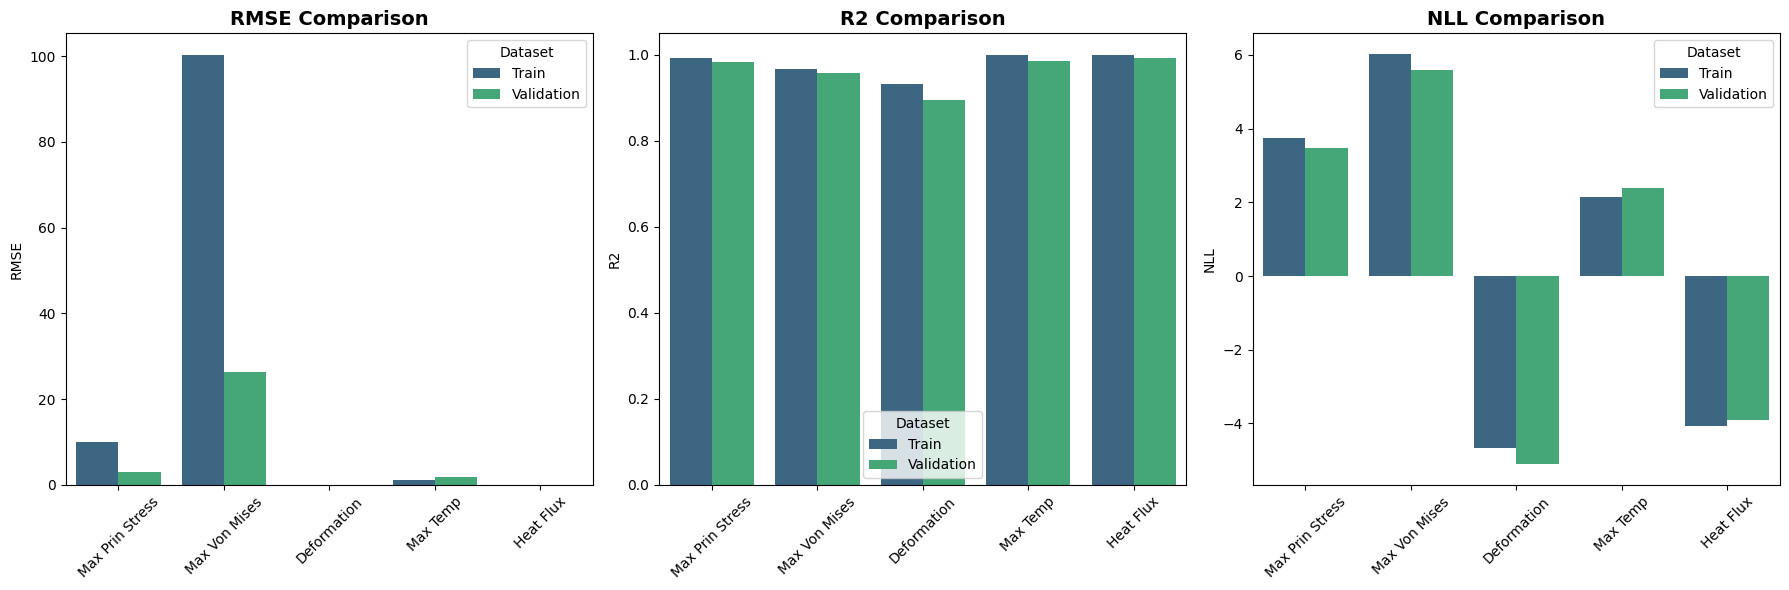

In [ ]:
import pandas as pd
import numpy as np
import torch
import gpytorch
import seaborn as sns
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# ==========================================
# 1. DATA INGESTION (Source of Truth)
# ==========================================
csv_content = """Run,Material,Power_W/mm2,Speed_mm/s,Radius_mm,Y1_Max_Prin_Stress (MPa),Y2_Max_Von_Mises,Y3_Deformation mm,Max Temp,Heat flux
1,CoCrFeNiMn ,137.27,5.31,1.44,355.95,1360.2,0.0172,255.24,0.4193
2,CoCrFeNiMn ,260.59,39.51,1.11,43.22,215.36,0.0027,58.48,0.0933
3,CoCrFeNiMn ,183.35,21.1,1.22,70.385,339.24,0.0042,79.584,0.1412
4,CoCrFeNiMn ,56.31,32.79,0.89,7.3,36.37,0.0005,28.17,0.0158
5,CoCrFeNiMn ,86.3,22.69,1.06,22.986,112.5,0.0014,41.09,0.0474
6,CoCrFeNiMn ,217.8,33.32,1.4,67.52,336.46,0.0042,78.97,0.1449
7,CoCrFeNiMn ,289.23,16.03,0.92,86.55,403.25,0.005,90.65,0.1651
8,CoCrFeNiMn ,169.14,49.17,1.27,29.557,147.42,0.0018,46.94,0.0649
9,CoCrFeNiMn ,147.07,16.71,0.94,43.89,204.7,0.0025,56.82,0.0838
10,CoCrFeNiMn ,282.05,28.76,1.29,0,0,0,22,0
11,AlCoCrFeNi,137.27,5.31,1.44,405.6,1982.7,0.031,254.83,0.4175
12,AlCoCrFeNi,260.59,39.51,1.11,57.721,310.92,0.005,58.41,0.093
13,AlCoCrFeNi,183.35,21.1,1.22,90.92,490.46,0.0078,79.47,0.1407
14,AlCoCrFeNi,56.31,32.79,0.89,9.65,51.98,0.0008,28.09,0.0156
15,AlCoCrFeNi,86.3,22.69,1.06,30.148,162.61,0.0026,41.06,0.0472
16,AlCoCrFeNi,217.8,33.32,1.4,90.2,485.68,0.0078,78.86,0.1444
17,AlCoCrFeNi,289.23,16.03,0.92,108.03,583.96,0.0092,90.52,0.1645
18,AlCoCrFeNi,169.14,49.17,1.27,39.49,212.61,0.0034,46.9,0.0646
19,AlCoCrFeNi,147.07,16.71,0.94,58.84,296.28,0.0047,56.75,0.0835
20,AlCoCrFeNi,282.05,28.76,1.29,0,0,0,22,0
21,FeCrNiTiAl,137.27,5.31,1.44,404.89,1980.9,0.0311,254.88,0.4171
22,FeCrNiTiAl,260.59,39.51,1.11,54.462,310.64,0.005,58.42,0.093
23,FeCrNiTiAl,183.35,21.1,1.22,58.788,490.1,0.0078,79.48,0.1406
24,FeCrNiTiAl,56.31,32.79,0.89,9.1938,52.51,0.0008,28.16,0.0158
25,FeCrNiTiAl,86.3,22.69,1.06,28.446,162.46,0.0026,41.06,0.0472
26,FeCrNiTiAl,217.8,33.32,1.4,85.11,485.24,0.0078,78.87,0.1444
27,FeCrNiTiAl,289.23,16.03,0.92,101.94,583.43,0.0093,90.532,0.1644
28,FeCrNiTiAl,169.14,49.17,1.27,37.258,212.41,0.0034,46.9,0.0646
29,FeCrNiTiAl,147.07,16.71,0.94,51.748,296.01,0.0047,56.76,0.0834
30,FeCrNiTiAl,282.05,28.76,1.29,0,0,0,22,0
31,NbSiTaTiZr,137.27,5.31,1.44,402.62,1985.1,0.0309,255.76,0.4206
32,NbSiTaTiZr,260.59,39.51,1.11,53.92,311.33,0.0049,58.57,0.0936
33,NbSiTaTiZr,183.35,21.1,1.22,70.41,407.24,0.0065,69.87,0.1175
34,NbSiTaTiZr,56.31,32.79,0.89,9.01,52.05,0.0008,28.12,0.0157
35,NbSiTaTiZr,86.3,22.69,1.06,24.83,134.91,0.0022,37.77,0.0326
36,NbSiTaTiZr,217.8,33.32,1.4,84.27,486.33,0.0077,79.1,0.1453
37,NbSiTaTiZr,289.23,16.03,0.92,100.84,584.51,0.0092,90.78,0.1654
38,NbSiTaTiZr,169.14,49.17,1.27,36.89,212.89,0.0034,47,0.065
39,NbSiTaTiZr,147.07,16.71,0.94,51.19,296.55,0.0047,56.88,0.0839
40,NbSiTaTiZr,282.05,28.76,1.29,0,0,0,22,0
41,HfNbTiZr,137.27,5.31,1.44,404.99,1990.7,0.0311,256.07,0.4218
42,HfNbTiZr,260.59,39.51,1.11,55.88,312.25,0.005,58.62,0.0938
43,HfNbTiZr,183.35,21.1,1.22,87.98,492.33,0.0078,79.77,0.1418
44,HfNbTiZr,56.31,32.79,0.89,9.34,52.2,0.0008,28.12,0.0157
45,HfNbTiZr,86.3,22.69,1.06,29.182,163.3,0.0026,41.165,0.0476
46,HfNbTiZr,217.8,33.32,1.4,87.193,487.08,0.0078,79.1,0.1455
47,HfNbTiZr,289.23,16.03,0.92,104.53,586.2,0.0093,90.88,0.1658
48,HfNbTiZr,169.14,49.17,1.27,38.227,213.52,0.0034,47.04,0.0652
49,HfNbTiZr,147.07,16.71,0.94,53.06,297.41,0.0047,56.93,0.0841
50,HfNbTiZr,282.05,28.76,1.29,0,0,0,22,0
"""
df = pd.read_csv(io.StringIO(csv_content))
df['Material'] = df['Material'].str.strip()
df_clean = df[(df['Y2_Max_Von_Mises'] > 1e-6) & (df['Heat flux'] > 1e-6)].copy()

# ==========================================
# 2. FEATURE ENGINEERING & SPLIT
# ==========================================
# Physics Embedding
material_props = {
    'CoCrFeNiMn': [8250, 12.5, 425],
    'AlCoCrFeNi': [8000, 15.0, 445],
    'FeCrNiTiAl': [8100, 15.0, 435],
    'NbSiTaTiZr': [8350, 10.0, 405],
    'HfNbTiZr':   [8450, 8.5,  395]
}
props_df = pd.DataFrame(df_clean['Material'].map(material_props).tolist(),
                        index=df_clean.index, columns=['Density', 'Conductivity', 'Cp'])
process_params = ['Power_W/mm2', 'Speed_mm/s', 'Radius_mm']
output_cols = ['Y1_Max_Prin_Stress (MPa)', 'Y2_Max_Von_Mises', 'Y3_Deformation mm', 'Max Temp', 'Heat flux']
labels = ['Max Prin Stress', 'Max Von Mises', 'Deformation', 'Max Temp', 'Heat Flux']

X_data = pd.concat([df_clean[process_params], props_df], axis=1)
y_data = df_clean[output_cols]

# 80/20 Train-Validation Split
X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(
    X_data, y_data, test_size=0.2, random_state=42
)

# Scaling (Fit on Train, Apply to Val)
X_scaler = MinMaxScaler()
y_scaler = StandardScaler()

X_train = torch.tensor(X_scaler.fit_transform(X_train_raw), dtype=torch.float32)
y_train = torch.tensor(y_scaler.fit_transform(y_train_raw), dtype=torch.float32)
X_val = torch.tensor(X_scaler.transform(X_val_raw), dtype=torch.float32)
y_val = torch.tensor(y_scaler.transform(y_val_raw), dtype=torch.float32)

# ==========================================
# 3. MOGP MODEL DEFINITION
# ==========================================
class MOGP_Surrogate(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(MOGP_Surrogate, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.MultitaskMean(gpytorch.means.ConstantMean(), num_tasks=5)
        self.covar_module = gpytorch.kernels.MultitaskKernel(
            gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=2.5, ard_num_dims=6)),
            num_tasks=5, rank=1
        )
    def forward(self, x):
        return gpytorch.distributions.MultitaskMultivariateNormal(self.mean_module(x), self.covar_module(x))

# ==========================================
# 4. TRAINING
# ==========================================
print("Training MOGP on 80% split...")
likelihood = gpytorch.likelihoods.MultitaskGaussianLikelihood(num_tasks=5)
model = MOGP_Surrogate(X_train, y_train, likelihood)

model.train(); likelihood.train()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

for i in range(100):
    optimizer.zero_grad()
    loss = -mll(model(X_train), y_train)
    loss.backward()
    optimizer.step()

# ==========================================
# 5. METRIC CALCULATION (Train vs Validation)
# ==========================================
model.eval(); likelihood.eval()

def compute_metrics(X, y_true_scaled, dataset_name):
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        # Get Predictive Distribution
        dist = likelihood(model(X))
        means = dist.mean
        variances = dist.variance

        # Inverse Transform Predictions
        y_pred = y_scaler.inverse_transform(means.numpy())
        y_true = y_scaler.inverse_transform(y_true_scaled.numpy())

        # Inverse Transform Variance (Var_real = Var_scaled * scale^2)
        y_var = variances.numpy() * (y_scaler.scale_ ** 2)

    metrics = []
    for i, col in enumerate(labels):
        # Deterministic Metrics
        rmse = np.sqrt(mean_squared_error(y_true[:, i], y_pred[:, i]))
        r2 = r2_score(y_true[:, i], y_pred[:, i])

        # Probabilistic Metric: Negative Log Likelihood (Gaussian Assumption)
        # NLL = 0.5 * (log(2*pi*var) + (true - pred)^2 / var)
        nll_vals = 0.5 * (np.log(2 * np.pi * y_var[:, i]) + (y_true[:, i] - y_pred[:, i])**2 / y_var[:, i])
        nll = np.mean(nll_vals)

        metrics.append({
            'Dataset': dataset_name,
            'Output': col,
            'RMSE': rmse,
            'R2': r2,
            'NLL': nll
        })
    return metrics

train_metrics = compute_metrics(X_train, y_train, 'Train')
val_metrics = compute_metrics(X_val, y_val, 'Validation')

df_metrics = pd.DataFrame(train_metrics + val_metrics)
print("\n--- Validation Results ---")
print(df_metrics.round(4).to_string())

# ==========================================
# 6. VISUALIZATION
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metric_types = ['RMSE', 'R2', 'NLL']
for i, metric in enumerate(metric_types):
    sns.barplot(data=df_metrics, x='Output', y=metric, hue='Dataset', ax=axes[i], palette='viridis')
    axes[i].set_title(f'{metric} Comparison', fontsize=14, weight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.savefig('train_val_metrics_comparison.pdf', format='pdf', dpi=300, bbox_inches='tight')
print("\n>> Saved comparison plot to 'train_val_metrics_comparison.pdf'")
plt.show()

In [ ]:
pip install gpytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.6/280.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.3/176.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 2.2 MB/s eta 0:00:00
